In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [6]:
# Load the dataset
file_path = 'C:/Users/cvs59/Downloads/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)


In [16]:
# Preprocessing: Handle categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])  # Categorical: Gender
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])  # Categorical: Ever Married
data['work_type'] = label_encoder.fit_transform(data['work_type'])  # Categorical: Work Type
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])  # Categorical: Residence Type
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])  # Categorical: Smoking Status

# Handling missing values in 'bmi' column by imputing with the mean
mean_bmi = data['bmi'].mean()
data['bmi'].fillna(mean_bmi, inplace=True)

# Define features (X) and target variable (y)
X = data.drop('stroke',axis=1)
y = data['stroke']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Logistic Regression model with class_weight='balanced'
logistic_model = LogisticRegression (max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train, y_train)

# Predict probabilities instead of class labels
logistic_probabilities = logistic_model.predict_proba(X_test) [:, 1]
logistic_predictions = logistic_model.predict(X_test)

# Calculate evaluation metrics
recall = recall_score(y_test, logistic_predictions)
f1 = f1_score(y_test, logistic_predictions)
roc_auc = roc_auc_score(y_test, logistic_probabilities)
accuracy = accuracy_score(y_test, logistic_predictions)

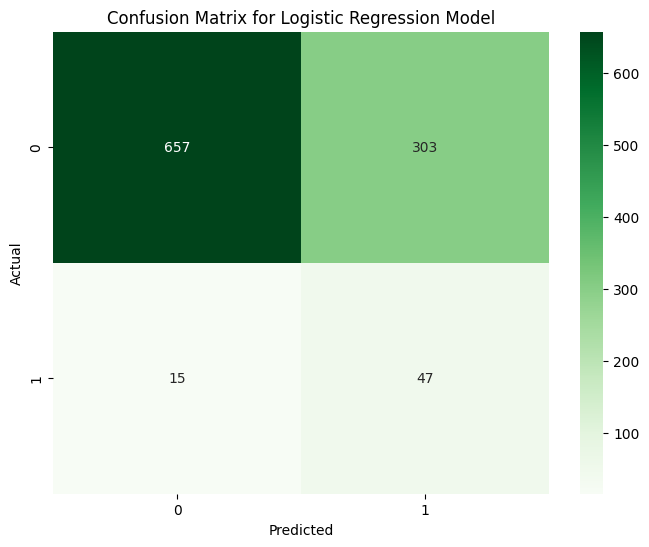

In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [30]:
# Print performance metrics
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Accuracy:", accuracy)

Recall: 0.7580645161290323
F1 Score: 0.26857142857142857
ROC-AUC Score: 0.8507728494623656
Accuracy: 0.7495107632093934


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load the dataset
file_path = 'C:/Users/cvs59/Downloads/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)


In [76]:
# Preprocessing: Handle categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])  
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

# Handling missing values in 'bmi' column by imputing with the mean
mean_bmi = data['bmi'].mean()
data['bmi'].fillna(mean_bmi, inplace=True)

# Define features (X) and target variable (y)
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
            'avg_glucose_level', 'bmi', 'smoking_status']
target = 'stroke'

X = data[features]
y = data[target]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# KNeighborsClassifier with adjusted hyperparameters
knn_classifier = KNeighborsClassifier(n_neighbors=5)  
knn_classifier.fit(X_resampled, y_resampled)

# Predictions on test set
knn_predictions = knn_classifier.predict(X_test)

In [77]:
# Calculate evaluation metrics
recall = recall_score(y_test, knn_predictions)
f1 = f1_score(y_test, knn_predictions)
roc_auc = roc_auc_score(y_test, knn_predictions)
accuracy = accuracy_score(y_test, knn_predictions)


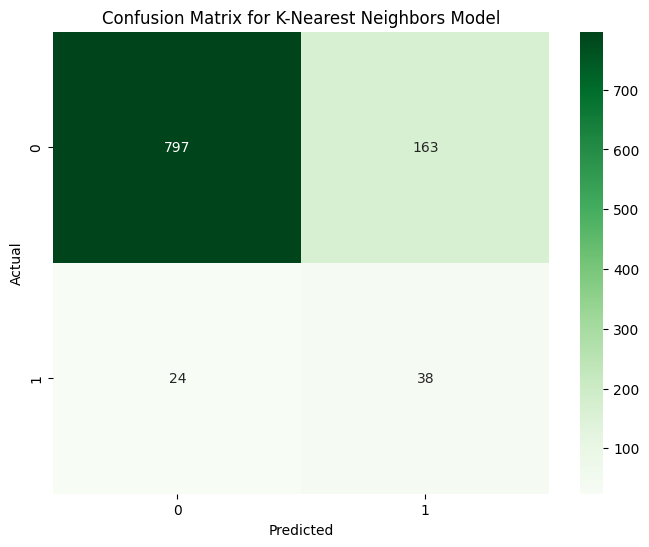

In [78]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors Model')
plt.show()


In [79]:
# Print performance metrics
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Accuracy:", accuracy)

Recall: 0.6129032258064516
F1 Score: 0.2889733840304182
ROC-AUC Score: 0.7215557795698924
Accuracy: 0.8170254403131115
